# Example of energy calibration

In [11]:
from nasagamma import spectrum as sp
import numpy as np
import pandas as pd
from nasagamma import peaksearch as ps
from nasagamma import peakfit as pf
from nasagamma import energy_calibration as ecal


# dataset 1
file = "data/gui_test_data_cebr.csv"
df = pd.read_csv(file)



In [12]:
df.head()

,counts
0,0
1,0
2,0
3,0
4,0


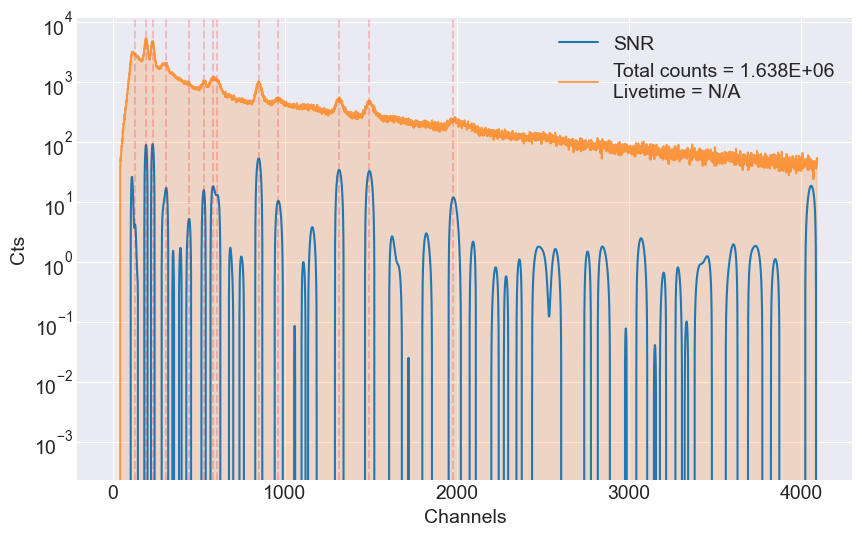

In [13]:
spect = sp.Spectrum(counts=df.counts)
fwhm_at_0 = 1.0
ref_x = 1315
ref_fwhm = 42
search = ps.PeakSearch(spect, ref_x, ref_fwhm, fwhm_at_0, min_snr=4)
search.plot_peaks(yscale="log")

Initialize a PeakFit object for the range of Co-60 lines and plot the fit in "full" mode

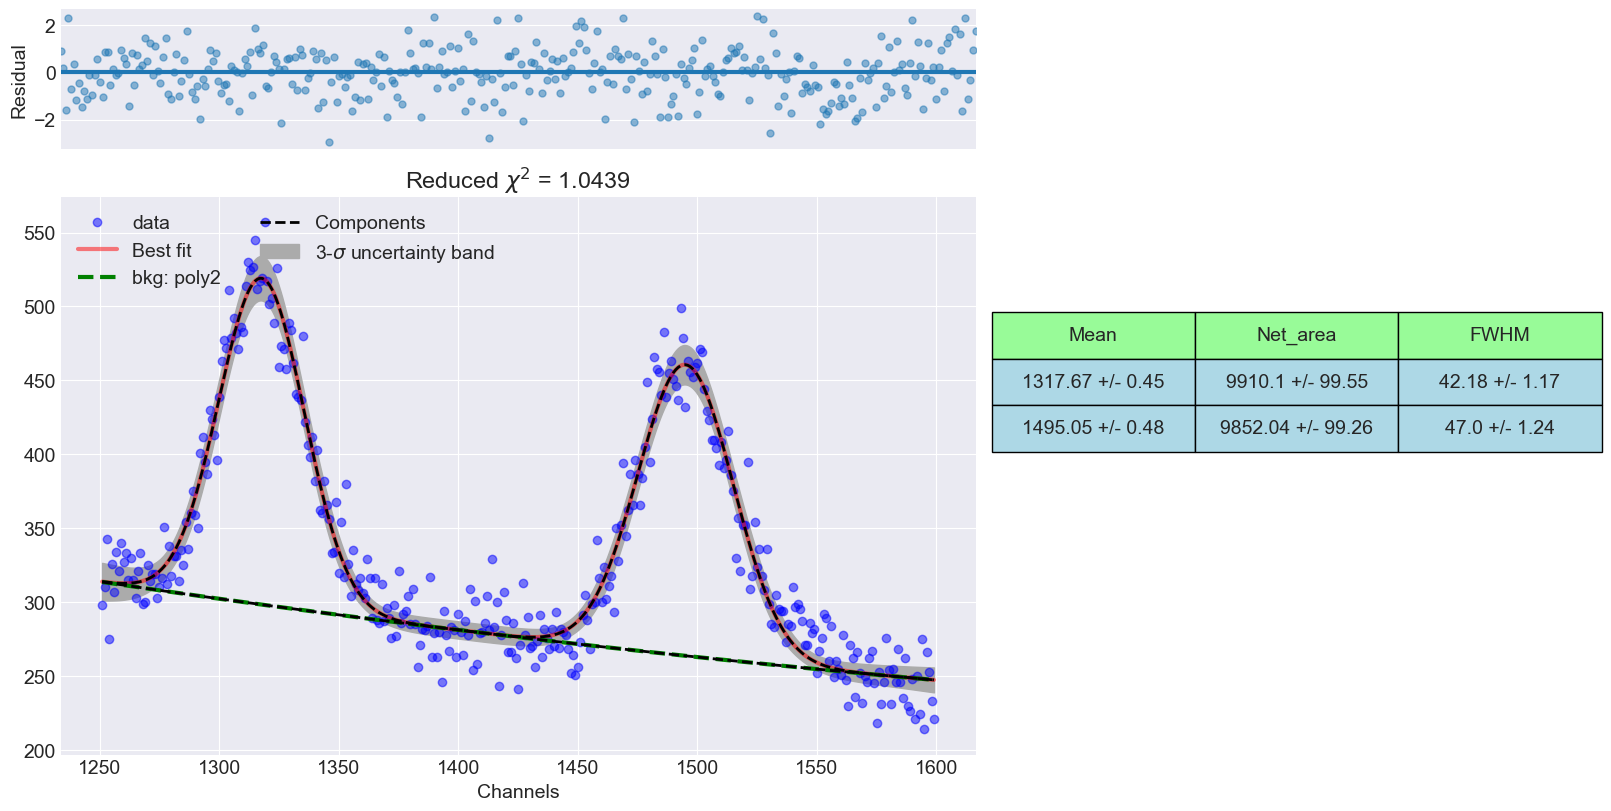

In [14]:
xrange = [1250, 1600]
bkg = "poly2"
fit = pf.PeakFit(search, xrange=xrange, bkg=bkg)
fit.plot(plot_type="full")


The fit errors can be found with the following command

In [15]:
print(fit.peak_err)

[{'mean_err1': 0.4478216923689498, 'area_err1': 99.54946645602328, 'fwhm_err1': 1.1728657016841375}, {'mean_err2': 0.4829355149545137, 'area_err2': 99.25745332832585, 'fwhm_err2': 1.2352308125763611}]


Perform the energy calibration by employing the ecalibration method from PeakFit. In a later notebook we will see how getting the list of mean values is easier when using Gaussian components. 

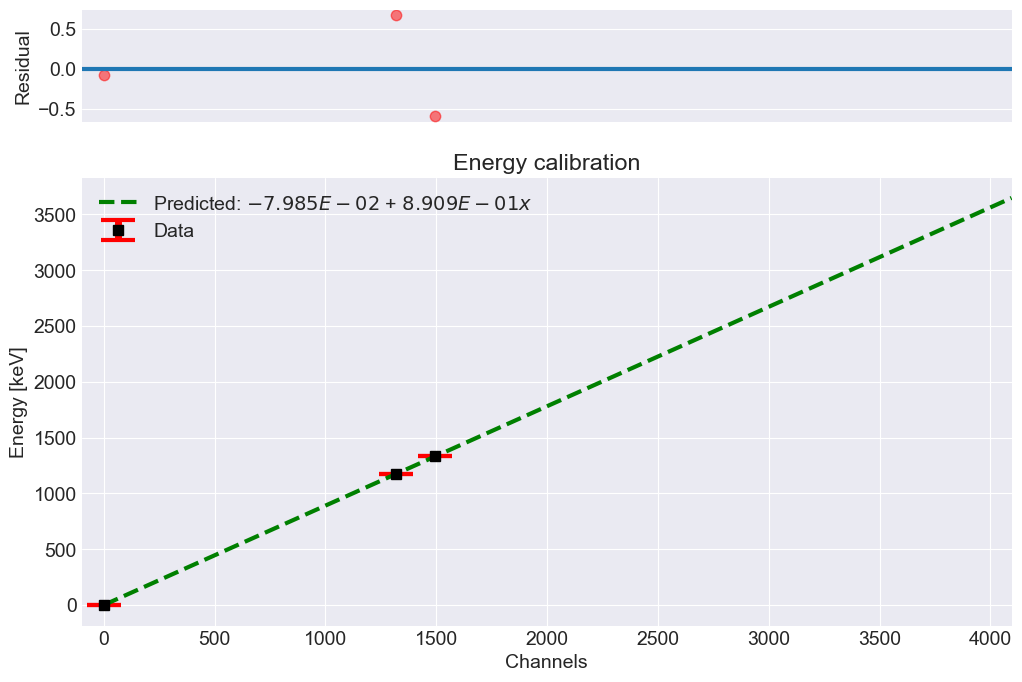

In [16]:
# energy calibration
peak_info = fit.peak_info
mean_values = [peak_info[0]['mean1'], peak_info[1]['mean2']]
mean_values.insert(0,0) # add the origin
erg = [0, 1173.2, 1332.5] # in keV

pred_erg, efit = ecal.ecalibration(mean_vals=mean_values, erg=erg, channels=spect.channels, n=1,
                                plot=True)

Plot calibrated spectrum

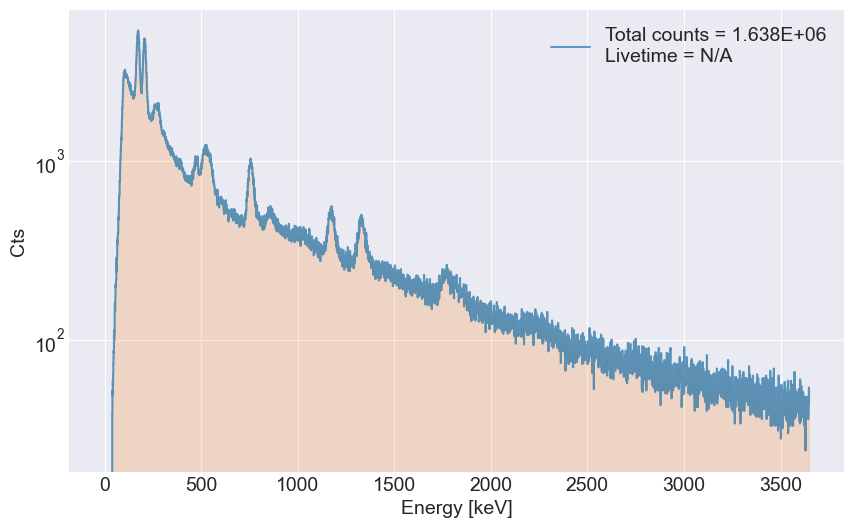

In [18]:
spect2 = sp.Spectrum(counts=df.counts, energies=pred_erg, e_units="keV")
spect2.plot()